In [ ]:
!pip3 install -U ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt

#Question 1

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

In [ ]:
original_wine_data = wine_quality.data.original
white_wine_df = original_wine_data[original_wine_data.color=='white']

features = white_wine_df.drop(columns=['quality','color'])

In [ ]:
targets = pd.DataFrame(white_wine_df['quality'])

In [ ]:
features.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


In [ ]:
targets.describe()

,quality
count,4898.000000
mean,5.877909
std,0.885639
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,9.000000


#Question 2

In [95]:
feature_correlation = features.corr()
feature_correlation

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433


In [96]:
target_correlation = targets.corr()
target_correlation

,quality
quality,1.0


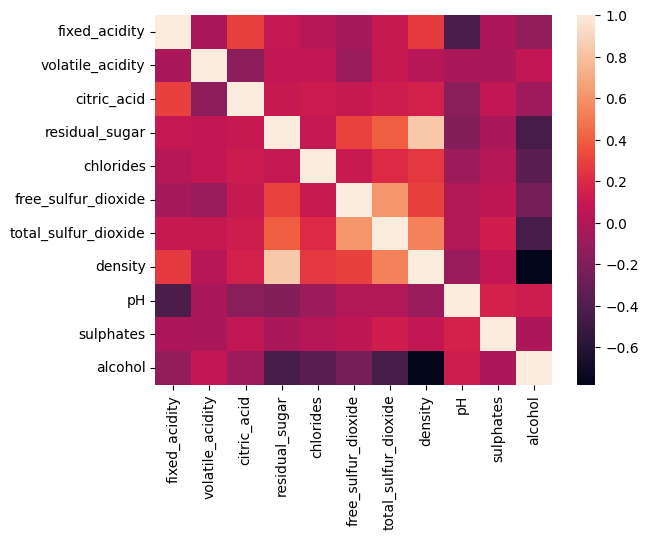

In [98]:
sns.heatmap(feature_correlation);

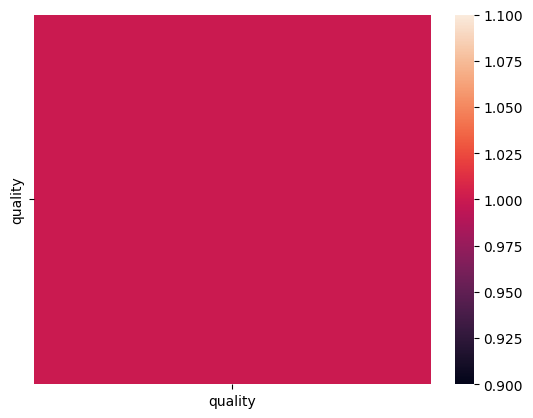

In [99]:
sns.heatmap(target_correlation);

#Question 3

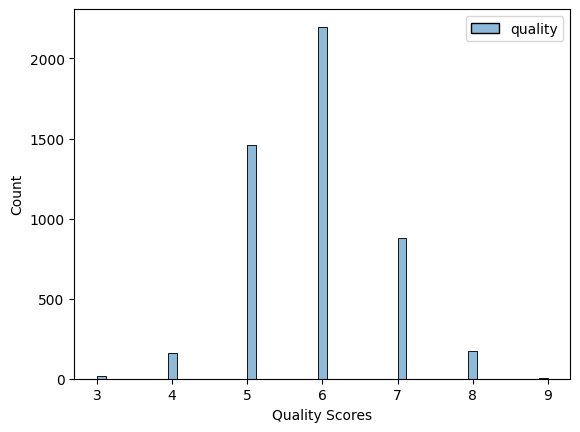

In [ ]:
target_histogram = sns.histplot(data=targets)
target_histogram.set_xlabel('Quality Scores');

#Question 4

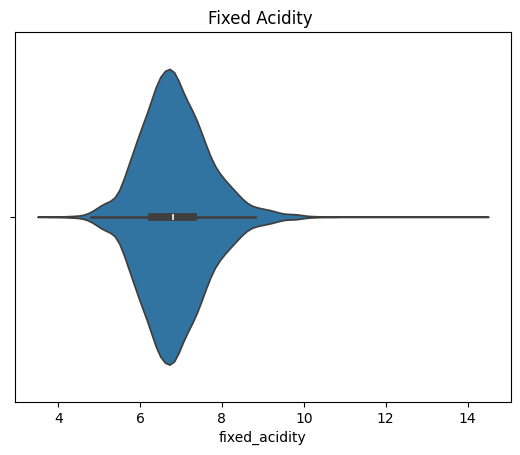

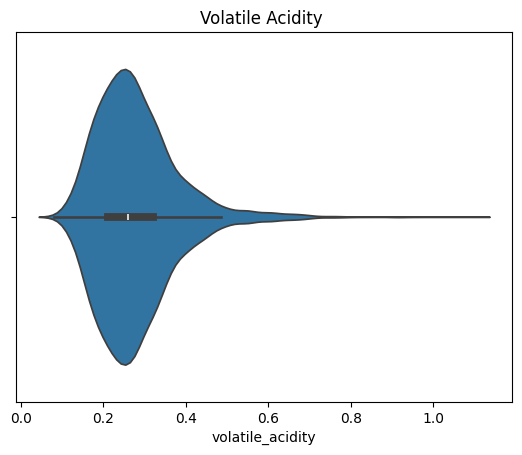

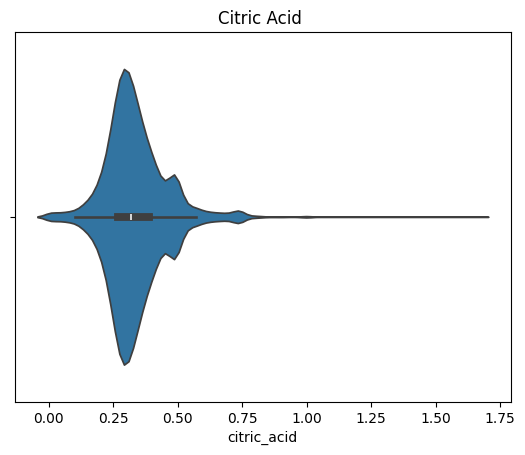

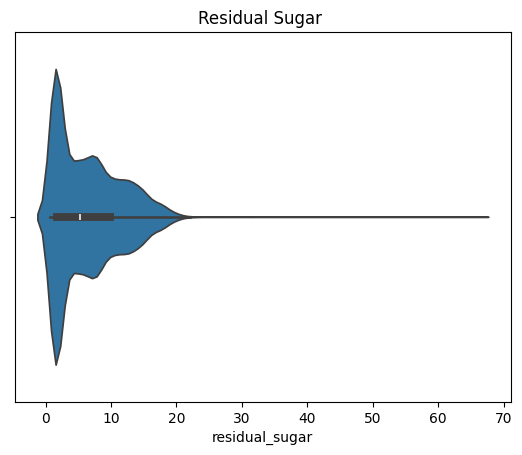

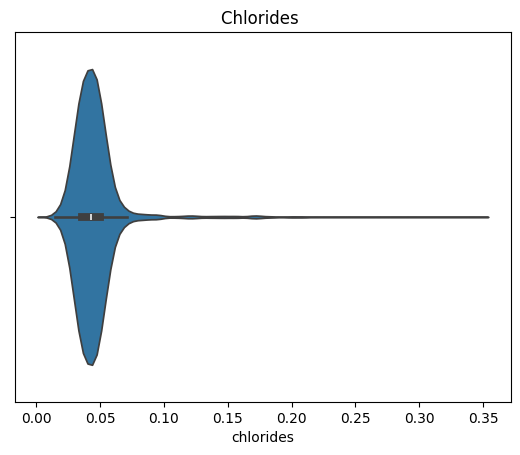

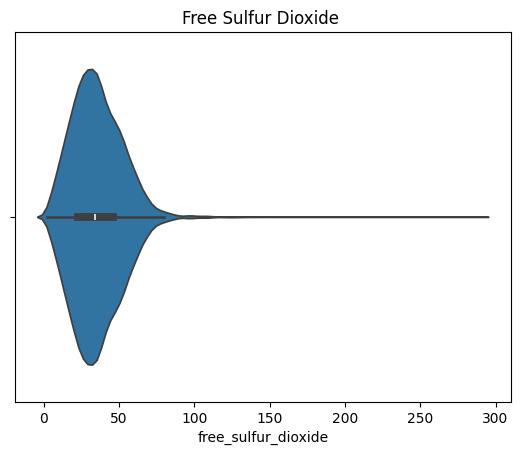

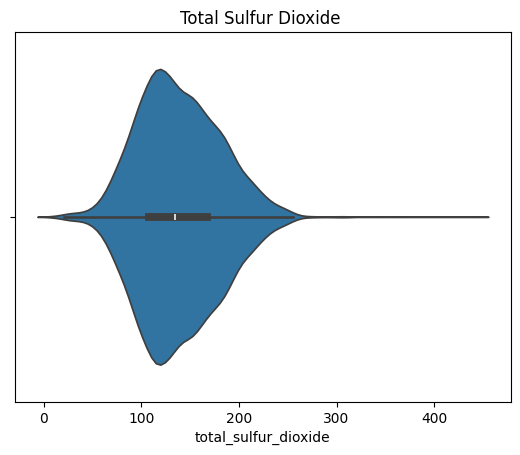

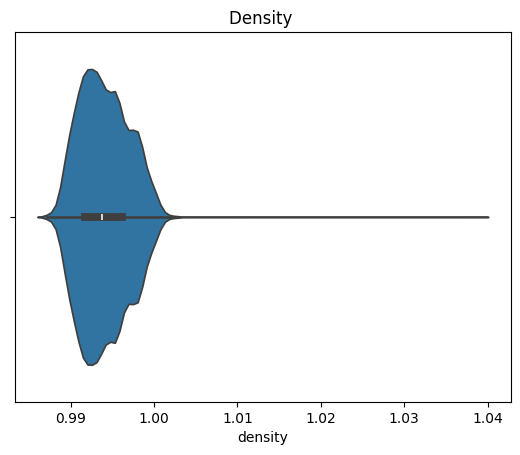

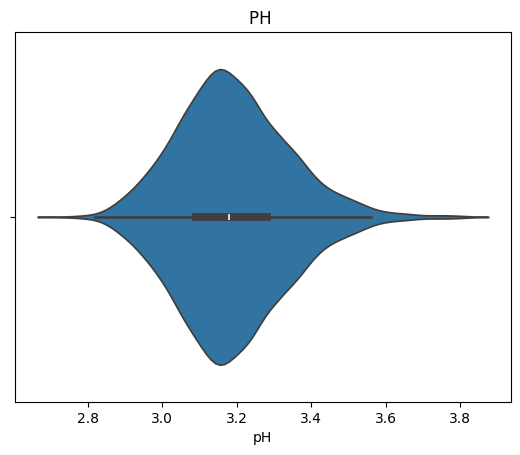

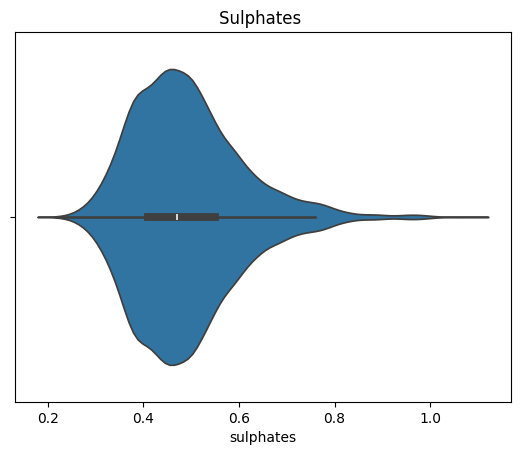

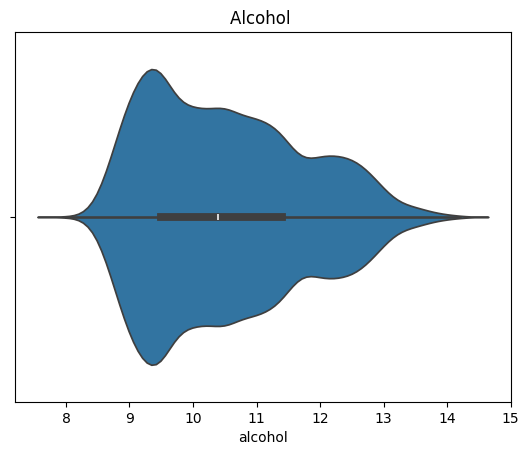

In [103]:
#Code for a mass plot of all features commented out below
##violin_wine = sns.violinplot(data=features)
##violin_wine.set_xlabel("Features")
##violin_wine.set_ylabel("Amount")
##violin_wine.tick_params(axis='x', rotation=90);

#It doesn't make sense to plot each feature on one plot due to scaling. Thus, a violing plot of each feature was made using a for loop.
# In the loop, the program handles auto labeling the graph
for var in features.keys():
  plt.figure()
  title_list = var.split('_')
  plot_title = ""
  for word in title_list:
    plot_title+=(word[0].upper()+word[1:]+" ")
  sns.violinplot(data=features,x=var).set_title(plot_title);

#Question 5

In [ ]:
model = LinearRegression()
model.fit(features[['alcohol']],targets['quality'])

print(f'Intercept (b0) = {model.intercept_}')
print(f'Coefficient (b1) = {model.coef_[0]}')

Intercept (b0) = 2.582009399160653
Coefficient (b1) = 0.3134693019133235


In [ ]:
fitted = model.predict(features[['alcohol']])

RMSE = np.sqrt(mean_squared_error(targets['quality'],fitted))
print(f'RMSE = {RMSE}')

r2 = r2_score(targets['quality'],fitted)
print(f'R2 = {r2}')

RMSE = 0.7971284628752668
R2 = 0.18972533274950443


#Question 6

In [ ]:
model2 = LinearRegression()
model2.fit(features[['volatile_acidity','alcohol','density']],targets['quality'])

print(f'Intercept (b0) = {model2.intercept_}')
print(f'Coefficient (b1) = {model2.coef_[0]}')

Intercept (b0) = -36.498611308344806
Coefficient (b1) = -2.0721159353648115


In [ ]:
fitted2 = model2.predict(features[['volatile_acidity','alcohol','density']])

RMSE = np.sqrt(mean_squared_error(targets['quality'],fitted2))
print(f'RMSE = {RMSE}')

r2 = r2_score(targets['quality'],fitted2)
print(f'R2 = {r2}')

RMSE = 0.7684872688163132
R2 = 0.24690635620080081
